In [1]:
import numpy as np, matplotlib.pyplot as plt, os
import matplotlib.gridspec as gridspec

import py21cmfast as p2c
import tools21cm as t2c
p2c.config['direc'] = '/scratch/snx3000/mibianco/21cmFAST-cache'

In [3]:
rseed = 2022
params = {'HII_DIM':1000, 'BOX_LEN':1500.}
path_in = '/store/ska/sk02/lightcones/EOS21/'
path_out = '/scratch/snx3000/mibianco/test_segunet/'

print('load data')
dT = np.load(path_in+'dT_EOS21_EoR.npy')
xHI = np.load(path_in+'xHI_EOS21_EoR.npy')
redshift = np.loadtxt(path_in+'redshift_EOS21_EoR.txt')

print('lc noise')
uvfile = '/store/ska/sk02/lightcones/EOS21/uvmap_1000_z7-10.pkl'
tobs = 1000
lc_noise = t2c.noise_lightcone(ncells=dT.shape[0], zs=redshift, obs_time=tobs, boxsize=params['BOX_LEN'], save_uvmap=uvfile, n_jobs=1)

dT1 = t2c.subtract_mean_signal(dT, los_axis=2) 
dT2, redshifts = t2c.smooth_lightcone(dT1, z_array=redshift, box_size_mpc=params['BOX_LEN'])
dT3, _ = t2c.smooth_lightcone(dT1 + lc_noise, z_array=redshifts, box_size_mpc=params['BOX_LEN'])

gal_fg = t2c.galactic_synch_fg(z=redshift, ncells=params['HII_DIM'], boxsize=params['BOX_LEN'], rseed=rseed)
#exgal_fg = t2c.extragalactic_pointsource_fg(z=lightcone.lightcone_redshifts, ncells=params['HII_DIM'], boxsize=params['BOX_LEN'])

#dT3wdg = t2c.rolling_wedge_removal_lightcone(lightcone=dT3, redshifts=redshifts)
dT4, _ = t2c.smooth_lightcone(t2c.subtract_mean_signal(dT+gal_fg+lc_noise, los_axis=2), z_array=redshift, box_size_mpc=params['BOX_LEN'])
#dT3exgf, _ = t2c.smooth_lightcone(t2c.subtract_mean_signal(dT+exgal_fg, los_axis=2), z_array=redshift, box_size_mpc=params['BOX_LEN'])
#dT3f, _ = t2c.smooth_lightcone(t2c.subtract_mean_signal(dT1+exgal_fg+gal_fg, los_axis=2), z_array=redshift, box_size_mpc=params['BOX_LEN'])
#dT3fn, _ = t2c.smooth_lightcone(t2c.subtract_mean_signal(dT+lc_noise+exgal_fg+gal_fg, los_axis=2), z_array=redshift, box_size_mpc=params['BOX_LEN'])

#dT3tot = t2c.rolling_wedge_removal_lightcone(lightcone=dTfg, redshifts=redshifts)

smt_xn, redshifts = t2c.smooth_lightcone(xHI, z_array=redshift, box_size_mpc=params['BOX_LEN'])
mask_xH = smt_xn>0.5

#t2c.save_cbin(path_out+'dT_21cm.bin', dT)
t2c.save_cbin(path_out+'dT2_21cm.bin', dT2)
t2c.save_cbin(path_out+'dT3_21cm.bin', dT3)
#t2c.save_cbin(path_out+'dT3wdg_21cm.bin', dT3wdg)
#t2c.save_cbin(path_out+'dT3gf_21cm.bin', dT3gf)
#t2c.save_cbin(path_out+'dT3exgf_21cm.bin', dT3exgf)
#t2c.save_cbin(path_out+'dT3f_21cm.bin', dT3f)
#t2c.save_cbin(path_out+'dT3fn_21cm.bin', dT3fn)
t2c.save_cbin(path_out+'dT4_21cm.bin', dT4)
t2c.save_cbin(path_out+'xHI_21cm.bin', xHI)
t2c.save_cbin(path_out+'xH_21cm.bin', mask_xH)
redshifts = np.savetxt(path_out+'lc_redshifts.txt', redshifts)

load data
lc noise
All or some uv maps is read from the given file. Be sure that they were run with the same parameter values as provided now.
Creating the uv maps.

z = 7.002 | 0.15 % completed | Elapsed time: 0.00 mins

z = 7.006 | 0.29 % completed | Elapsed time: 0.00 mins

z = 7.010 | 0.44 % completed | Elapsed time: 0.00 mins

z = 7.014 | 0.58 % completed | Elapsed time: 0.00 mins

z = 7.019 | 0.73 % completed | Elapsed time: 0.00 mins

z = 7.023 | 0.88 % completed | Elapsed time: 0.00 mins

z = 7.027 | 1.02 % completed | Elapsed time: 0.00 mins

z = 7.032 | 1.17 % completed | Elapsed time: 0.00 mins

z = 7.036 | 1.31 % completed | Elapsed time: 0.00 mins

z = 7.040 | 1.46 % completed | Elapsed time: 0.00 mins

z = 7.045 | 1.61 % completed | Elapsed time: 0.00 mins

z = 7.049 | 1.75 % completed | Elapsed time: 0.00 mins

z = 7.053 | 1.90 % completed | Elapsed time: 0.00 mins

z = 7.058 | 2.04 % completed | Elapsed time: 0.00 mins

z = 7.062 | 2.19 % completed | Elapsed time: 0.00 

100%|██████████| 685/685 [01:25<00:00,  8.03it/s]


In [4]:
np.save(path_out+'dTexfrg_EOS21_EoR.npy', gal_fg)


In [2]:
from matplotlib import colors
import matplotlib.pyplot as plt
import math

class MidpointNormalize(colors.Normalize):
    """
    Created by Joe Kington.
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    # set the colormap and centre the colorbar
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


In [3]:
rseed = 2022
z_min, z_max = 9, 11
zeta, Rmfp, Tvir = 39.204, 12.861, 4.53
LX, Tvir_X = 42., 5.

params = {'HII_DIM':1000, 'DIM':0, 'BOX_LEN':1500.}

#params = {'HII_DIM':128, 'DIM':512, 'BOX_LEN':256}#, 'USE_INTERPOLATION_TABLES': True}
#a_params = {'HII_EFF_FACTOR':zeta, 'R_BUBBLE_MAX':Rmfp, 'ION_Tvir_MIN':Tvir}

#params = {'HII_DIM':200, 'DIM':600, 'BOX_LEN':300}
a_params = {'HII_EFF_FACTOR':zeta, 'R_BUBBLE_MAX':Rmfp, 'ION_Tvir_MIN':Tvir, 'L_X':LX, 'X_RAY_Tvir_MIN':Tvir_X}

c_params = {'OMm':0.27, 'OMb':0.046, 'SIGMA_8':0.82, 'POWER_INDEX':0.96}

tobs = 1000

In [4]:
%%time
lightcone = p2c.run_lightcone(redshift=z_min, max_redshift=z_max,
                              user_params=params,
                              astro_params=a_params,
                              cosmo_params=c_params,
                              #flag_options={"USE_TS_FLUCT": True},
                              lightcone_quantities=("brightness_temp", 'xH_box'),
                              global_quantities=("brightness_temp", 'xH_box'),
                              cleanup=True,
                              random_seed=rseed)

print(lightcone.brightness_temp.shape)
print(lightcone.lightcone_dimensions, 'cMpc')
print(lightcone.lightcone_redshifts.min(), lightcone.lightcone_redshifts.max()) 

(128, 128, 235)
(256, 256, 470.0) cMpc
9.000000014931944 11.012600475360019
CPU times: user 6.69 s, sys: 1.88 s, total: 8.58 s
Wall time: 8.86 s


0.7062383 0.91265893


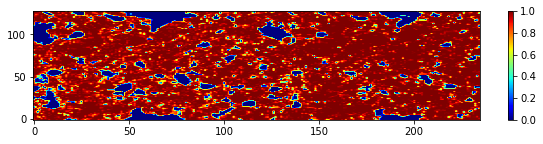

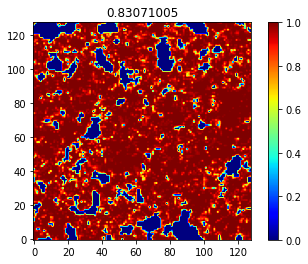

NameError: name 'redshift' is not defined

<Figure size 432x288 with 0 Axes>

In [10]:
data = lightcone.xH_box
print(np.mean(data[...,0]), np.mean(data[...,-1])) 
i_plot = 100
plt.figure(figsize=(10,2))
plt.imshow(data[:,params['HII_DIM']//2,:], cmap='jet', origin='lower', aspect='auto')
plt.colorbar()
plt.show(), plt.clf()

plt.title(np.mean(data[:,:,i_plot]))
plt.imshow(data[:,:,i_plot], cmap='jet', origin='lower')#, norm=MidpointNormalize(vmin=dT[:,:,i_plot].min(), vmax=dT[:,:,i_plot].max(), midpoint=0))
plt.colorbar()
plt.show(), plt.clf()

mean_data = np.std(data, axis=(0,1))
plt.plot(redshift, mean_data)
print(data.max(), data.min())
print(mean_data.max(), mean_data.min())
print(redshift.min(), redshift.max())

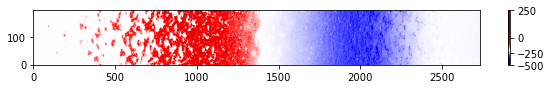

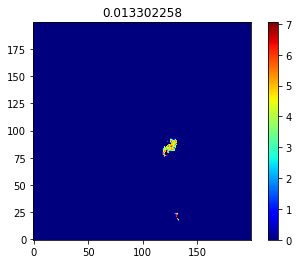

22.43957 -443.4805
47.4834 0.0
5.0 35.05694


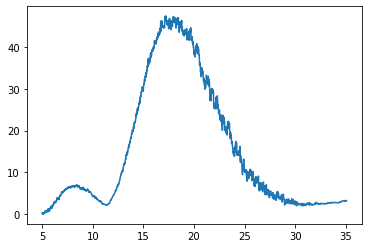

In [40]:
i_plot = 0
path = '/scratch/snx3000/mibianco/dataLC_200_valid_080922/'
data = t2c.read_cbin(path+'data/dT_21cm_i100.bin')
redshift = np.loadtxt(path+'lc_redshifts.txt')

plt.figure(figsize=(10,1))
plt.imshow(data[:,params['HII_DIM']//2,:], cmap='seismic', origin='lower', aspect='auto', norm=MidpointNormalize(vmin=data.min(), vmax=data.max(), midpoint=0))
plt.colorbar()
plt.show(), plt.clf()

plt.title(np.mean(data[:,:,i_plot]))
plt.imshow(data[:,:,i_plot], cmap='jet', origin='lower')#, norm=MidpointNormalize(vmin=dT[:,:,i_plot].min(), vmax=dT[:,:,i_plot].max(), midpoint=0))
plt.colorbar()
plt.show(), plt.clf()

mean_data = np.std(data, axis=(0,1))
plt.plot(redshift, mean_data)
print(data.max(), data.min())
print(mean_data.max(), mean_data.min())
print(redshift.min(), redshift.max())

In [5]:
#uvfile = '/store/ska/sk09/segunet/uvmap_128_z7-20.pkl'
uvfile = '/store/ska/sk09/segunet/uvmap_200_z7-30.pkl'

lc_noise = t2c.noise_lightcone(ncells = lightcone.brightness_temp.shape[0],  
                               zs = lightcone.lightcone_redshifts, 
                               obs_time = tobs,
                               boxsize = params['BOX_LEN'],
                               save_uvmap = uvfile,
                               n_jobs=1)

All or some uv maps is read from the given file. Be sure that they were run with the same parameter values as provided now.
Creating the uv maps.

z = 7.000 | 0.18 % completed | Elapsed time: 0.00 mins

z = 7.005 | 0.36 % completed | Elapsed time: 0.00 mins

z = 7.011 | 0.54 % completed | Elapsed time: 0.00 mins

z = 7.016 | 0.72 % completed | Elapsed time: 0.00 mins

z = 7.021 | 0.91 % completed | Elapsed time: 0.00 mins

z = 7.027 | 1.09 % completed | Elapsed time: 0.00 mins

z = 7.032 | 1.27 % completed | Elapsed time: 0.00 mins

z = 7.038 | 1.45 % completed | Elapsed time: 0.00 mins

z = 7.043 | 1.63 % completed | Elapsed time: 0.00 mins

z = 7.048 | 1.81 % completed | Elapsed time: 0.00 mins

z = 7.054 | 1.99 % completed | Elapsed time: 0.00 mins

z = 7.059 | 2.17 % completed | Elapsed time: 0.00 mins

z = 7.065 | 2.36 % completed | Elapsed time: 0.00 mins

z = 7.070 | 2.54 % completed | Elapsed time: 0.00 mins

z = 7.075 | 2.72 % completed | Elapsed time: 0.00 mins

z = 7.081 | 2

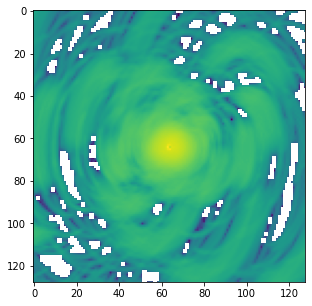

In [6]:
import pickle

object = pickle.load(open(uvfile, 'rb'))
Nant = object['Nant']

plt.rcParams['figure.figsize'] = [15, 5]
plt.imshow(np.log10(np.fft.fftshift(object['7.000'])))

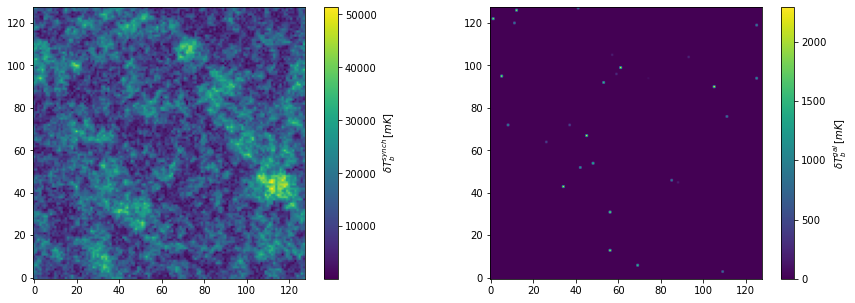

(None, None)

<Figure size 1080x360 with 0 Axes>

In [7]:
gal_fg = t2c.galactic_synch_fg(z=lightcone.lightcone_redshifts, ncells=params['HII_DIM'], boxsize=params['BOX_LEN'], rseed=rseed)
exgal_fg = t2c.extragalactic_pointsource_fg(z=lightcone.lightcone_redshifts, ncells=params['HII_DIM'], boxsize=params['BOX_LEN'])

iz = 100
fig, (ax1, ax2) = plt.subplots(1, 2)
im = ax1.imshow(gal_fg[:,:,iz], origin='lower')
plt.colorbar(im, ax=ax1, label=r'$\delta T^{synch}_b\,[mK]$')
im = ax2.imshow(exgal_fg[:,:,iz], origin='lower')
plt.colorbar(im, ax=ax2, label=r'$\delta T^{gal}_b\,[mK]$')
plt.show(), plt.clf()

In [31]:
path_input = '/scratch/snx3000/mibianco/test_segunet/'

if not (os.path.exists(path_input+'dT_21cm.bin')):
    dT = lightcone.brightness_temp
    dT1 = t2c.subtract_mean_signal(dT, los_axis=2) 
    dT2, redshifts = t2c.smooth_lightcone(dT1, z_array=lightcone.lightcone_redshifts, box_size_mpc=params['BOX_LEN'])
    dT3, _ = t2c.smooth_lightcone(dT1 + lc_noise, z_array=lightcone.lightcone_redshifts, box_size_mpc=params['BOX_LEN'])
    
    #dT3wdg = t2c.rolling_wedge_removal_lightcone(lightcone=dT3, redshifts=redshifts)
    dT3gf, _ = t2c.smooth_lightcone(t2c.subtract_mean_signal(dT + gal_fg, los_axis=2), z_array=lightcone.lightcone_redshifts, box_size_mpc=params['BOX_LEN'])
    dT3exgf, _ = t2c.smooth_lightcone(t2c.subtract_mean_signal(dT + exgal_fg, los_axis=2), z_array=lightcone.lightcone_redshifts, box_size_mpc=params['BOX_LEN'])
    dT3f, _ = t2c.smooth_lightcone(t2c.subtract_mean_signal(dT1 + exgal_fg + gal_fg, los_axis=2), z_array=lightcone.lightcone_redshifts, box_size_mpc=params['BOX_LEN'])
    dT3fn, _ = t2c.smooth_lightcone(t2c.subtract_mean_signal(dT + lc_noise + exgal_fg + gal_fg, los_axis=2), z_array=lightcone.lightcone_redshifts, box_size_mpc=params['BOX_LEN'])
    
    #dT3tot = t2c.rolling_wedge_removal_lightcone(lightcone=dTfg, redshifts=redshifts)
    
    xHI = lightcone.xH_box
    smt_xn, redshifts = t2c.smooth_lightcone(xHI, z_array=lightcone.lightcone_redshifts, box_size_mpc=params['BOX_LEN'])
    mask_xH = smt_xn>0.5
    
    t2c.save_cbin(path_input+'dT_21cm.bin', dT)
    t2c.save_cbin(path_input+'dT2_21cm.bin', dT2)
    t2c.save_cbin(path_input+'dT3_21cm.bin', dT3)
    #t2c.save_cbin(path_input+'dT3wdg_21cm.bin', dT3wdg)
    t2c.save_cbin(path_input+'dT3gf_21cm.bin', dT3gf)
    t2c.save_cbin(path_input+'dT3exgf_21cm.bin', dT3exgf)
    t2c.save_cbin(path_input+'dT3f_21cm.bin', dT3f)
    t2c.save_cbin(path_input+'dT3fn_21cm.bin', dT3fn)
    t2c.save_cbin(path_input+'xHI_21cm.bin', xHI)
    t2c.save_cbin(path_input+'xH_21cm.bin', mask_xH)
    redshifts = np.savetxt(path_input+'lc_redshifts.txt', redshifts)
else:
    dT = t2c.read_cbin(path_input+'dT_21cm.bin')
    dT2 = t2c.read_cbin(path_input+'dT2_21cm.bin')
    dT3 = t2c.read_cbin(path_input+'dT3_21cm.bin')
    dT3wdg = t2c.read_cbin(path_input+'dT3wdg_21cm.bin')
    xHI = t2c.read_cbin(path_input+'xHI_21cm.bin')
    mask_xH = t2c.read_cbin(path_input+'xH_21cm.bin')
    redshifts = np.loadtxt(path_input+'lc_redshifts.txt')

100%|██████████| 552/552 [00:00<00:00, 994.93it/s] 


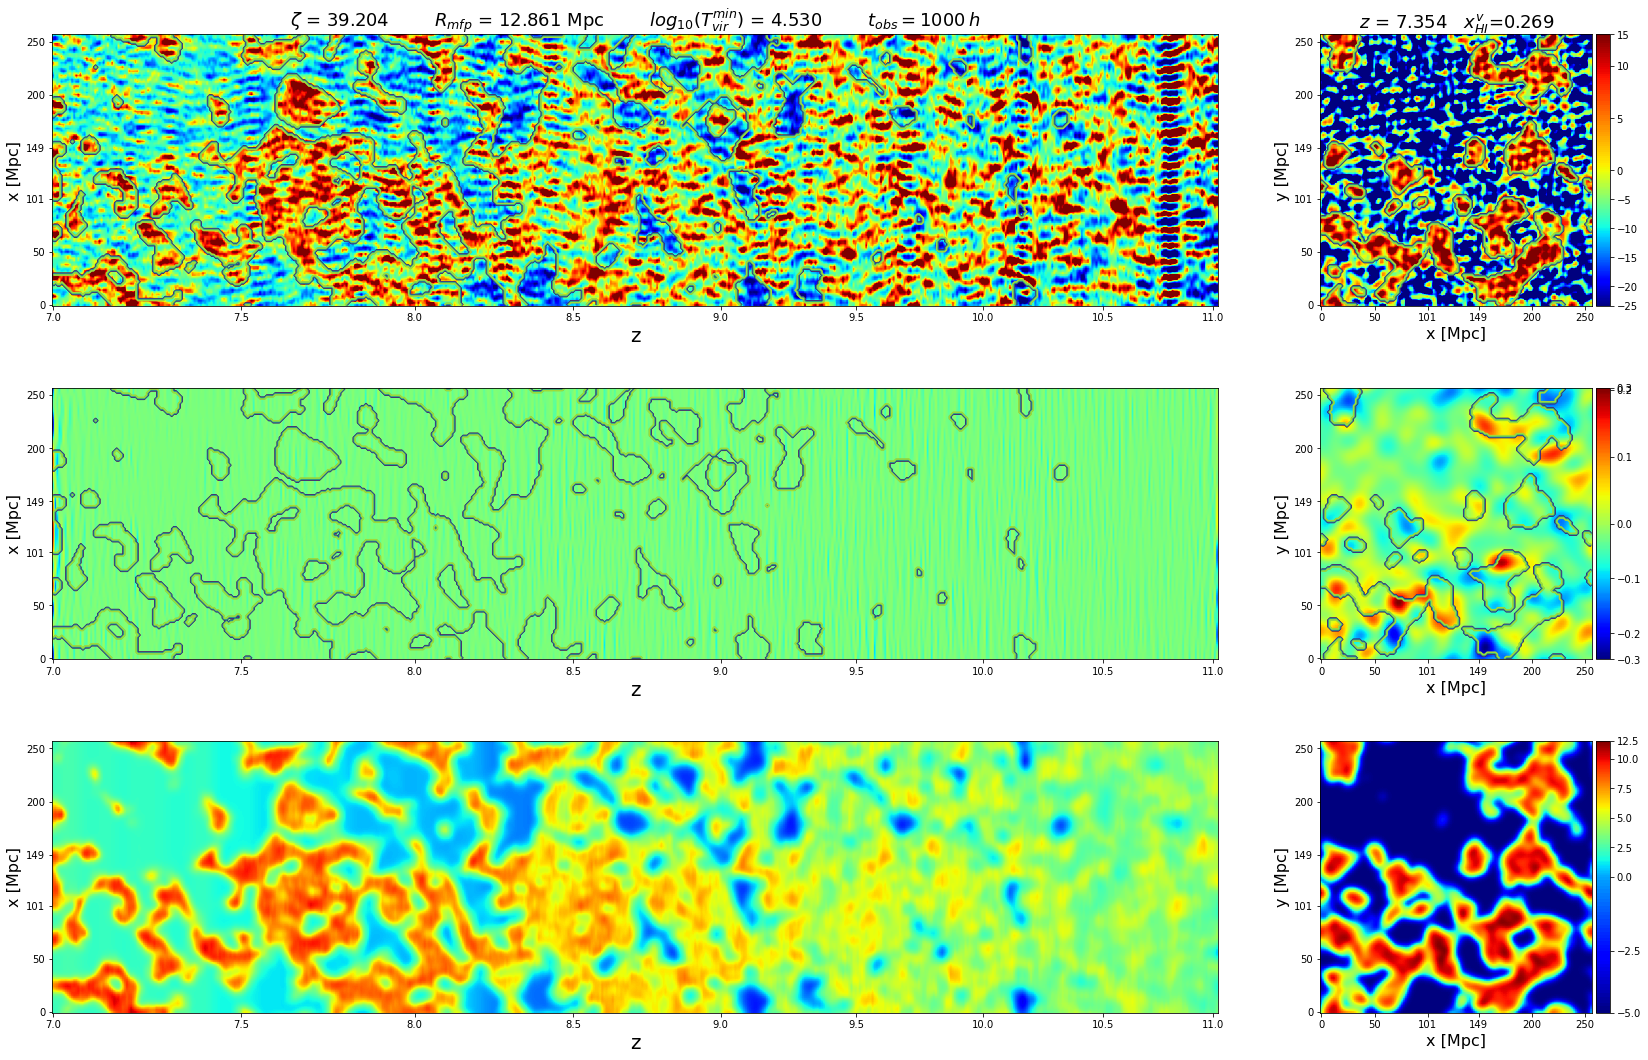

In [15]:
i_plot=64

fig = plt.figure(figsize=(28, 18))
gs = gridspec.GridSpec(nrows=3, ncols=2, width_ratios=[3,1], height_ratios=[1, 1, 1])

# FIRST LC PLOT
ax0 = fig.add_subplot(gs[0,0])
ax0.set_title('$\zeta$ = %.3f        $R_{mfp}$ = %.3f Mpc        $log_{10}(T_{vir}^{min})$ = %.3f        $t_{obs}=%d\,h$' %(zeta, Rmfp, Tvir, tobs), fontsize=18)
im = ax0.imshow(dT3[:,params['HII_DIM']//2,:], cmap='jet', aspect='auto', origin='lower', norm=MidpointNormalize(vmin=dT2.min(), vmax=dT2.max(), midpoint=0))
ax0.contour(mask_xH[:,params['HII_DIM']//2,:])
adjust_axis(axis=ax0, varr=redshifts, xy='x', to_round=1, step=0.5, fmt=int)
adjust_axis(axis=ax0, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='y', to_round=250, step=50, fmt=int)

ax01 = fig.add_subplot(gs[0,1])
ax01.set_title('$z$ = %.3f   $x^v_{HI}$=%.3f' %(redshifts[i_plot], np.mean(xHI[:,:,i_plot])), fontsize=18)
ax01.imshow(dT3[:,:,i_plot], cmap='jet', origin='lower', norm=MidpointNormalize(vmin=dT2[:,:,i_plot].min(), vmax=dT2[:,:,i_plot].max(), midpoint=0))
ax01.contour(mask_xH[:,:,i_plot])
adjust_axis(axis=ax01, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='x', to_round=250, step=50, fmt=int)
adjust_axis(axis=ax01, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='y', to_round=250, step=50, fmt=int)
fig.colorbar(im, ax=ax01, pad=0.01, fraction=0.048)

# SECOND LC PLOT
ax1 = fig.add_subplot(gs[1,0])
#ax1.imshow(dT3_wdg[:,params['HII_DIM']//2,:], cmap='jet', aspect='auto', origin='lower', norm=MidpointNormalize(vmin=dT2_smt.min(), vmax=dT2_smt.max(), midpoint=0))
ax1.imshow(dT3wdg[:,params['HII_DIM']//2,:], cmap='jet', aspect='auto', origin='lower', norm=MidpointNormalize(vmin=dT3wdg.min(), vmax=dT3wdg.max(), midpoint=0))
ax1.contour(mask_xH[:,params['HII_DIM']//2,:])
adjust_axis(axis=ax1, varr=redshifts, xy='x', to_round=1, step=0.5, fmt=int)
adjust_axis(axis=ax1, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='y', to_round=250, step=50, fmt=int)

ax11 = fig.add_subplot(gs[1,1])
im = ax11.imshow(dT3wdg[:,:,i_plot], cmap='jet', origin='lower', norm=MidpointNormalize(vmin=dT3wdg[:,:,i_plot].min(), vmax=dT3wdg[:,:,i_plot].max(), midpoint=0))
ax11.contour(mask_xH[:,:,i_plot])
adjust_axis(axis=ax11, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='x', to_round=250, step=50, fmt=int)
adjust_axis(axis=ax11, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='y', to_round=250, step=50, fmt=int)
fig.colorbar(im, ax=ax11, pad=0.01, fraction=0.048)

# THIRD LC PLOT
ax2 = fig.add_subplot(gs[2,0])
ax2.imshow(dT2[:,params['HII_DIM']//2,:], cmap='jet', origin='lower', aspect='auto', norm=MidpointNormalize(vmin=dT2.min(), vmax=dT2.max(), midpoint=0))
#ax2.imshow(xHI[:,params['HII_DIM']//2,:], cmap='jet', origin='lower')
adjust_axis(axis=ax2, varr=redshifts, xy='x', to_round=1, step=0.5, fmt=int)
adjust_axis(axis=ax2, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='y', to_round=250, step=50, fmt=int)

ax21 = fig.add_subplot(gs[2,1])
im = ax21.imshow(dT2[:,:,i_plot], cmap='jet', origin='lower', norm=MidpointNormalize(vmin=dT2[:,:,i_plot].min(), vmax=dT2[:,:,i_plot].max(), midpoint=0))
#im = ax21.imshow(xHI[:,:,i_plot], cmap='jet', origin='lower', vmin=xHI.min(), vmax=xHI.max())
adjust_axis(axis=ax21, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='x', to_round=250, step=50, fmt=int)
adjust_axis(axis=ax21, varr=np.linspace(0, params['BOX_LEN'], params['HII_DIM']), xy='y', to_round=250, step=50, fmt=int)
fig.colorbar(im, ax=ax21, pad=0.01, fraction=0.048)


for ax in [ax0, ax1, ax2]:
    ax.set_ylabel('x [Mpc]', size=16)
    ax.set_xlabel('z', size=20)

for ax in [ax01, ax11, ax21]:
    ax.set_ylabel('y [Mpc]', size=16)
    ax.set_xlabel('x [Mpc]', size=16)

plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.2
plt.subplots_adjust(hspace=0.3, wspace=0.01)
#plt.savefig('lc_256Mpc_128.png', bbox_inches='tight')

## create Cube 

In [10]:
z = 12.5
zeta = 30.580
Rmfp = 6.600
Tvir = 4.899

#params = {'HII_DIM':64, 'DIM':192, 'BOX_LEN':128}
params = {'HII_DIM':128, 'DIM':384, 'BOX_LEN':256}
my_ext = [0, params['BOX_LEN'], 0, params['BOX_LEN']]

c_params = {'OMm':0.27, 'OMb':0.046, 'SIGMA_8':0.82, 'POWER_INDEX':0.96}
a_params = {'HII_EFF_FACTOR':zeta, 'R_BUBBLE_MAX':Rmfp, 'ION_Tvir_MIN':Tvir, 'L_X':42.}

ic = p2c.initial_conditions(user_params=params, cosmo_params=c_params, random_seed=11)
#cube = p2c.run_coeval(redshift=z, init_box=ic, astro_params=a_params, zprime_step_factor=1.05)

pert_field = p2c.perturb_field(redshift=z, init_boxes=ic)
T_S = p2c.spin_temperature(perturbed_field=pert_field, astro_params=a_params, zprime_step_factor=1.05)
ionized_box = p2c.ionize_box(spin_temp=T_S, zprime_step_factor=1.05, z_heat_max=20.0)
cubeS = p2c.brightness_temperature(ionized_box=ionized_box, perturbed_field=pert_field, spin_temp=T_S)
dTS = cubeS.brightness_temp
#print(' z = %.3f\t xn = %.3f' %(z, np.mean(cube.xH_box)))

In [12]:
dTS.min(), dTS.max()

(0.0, 70.98655)

In [14]:
p2c.run_lightcone??

Signature:
p2c.run_lightcone(
    *,
    redshift=None,
    max_redshift=None,
    user_params=None,
    cosmo_params=None,
    astro_params=None,
    flag_options=None,
    regenerate=None,
    write=None,
    lightcone_quantities=('brightness_temp',),
    global_quantities=('brightness_temp', 'xH_box'),
    direc=None,
    init_box=None,
    perturb=None,
    random_seed=None,
    coeval_callback=None,
    coeval_callback_redshifts=1,
    use_interp_perturb_field=False,
    cleanup=True,
    hooks=None,
    always_purge: bool = False,
    **global_kwargs,
)
Source:   
def run_lightcone(
    *,
    redshift=None,
    max_redshift=None,
    user_params=None,
    cosmo_params=None,
    astro_params=None,
    flag_options=None,
    regenerate=None,
    write=None,
    lightcone_quantities=("brightness_temp",),
    global_quantities=("brightness_temp", "xH_box"),
    direc=None,
    init_box=None,
    perturb=None,
    random_seed=None,
    coeval_callback=None,
    coeval_callback_redshi